In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Data Preprocessing

In [2]:
# read csv file into dataframe

df = pd.read_csv('Spotify_Youtube.csv')

# print keys
df.keys()

Index(['Num', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [3]:
# null values in dataset
df.isnull().sum()

Num                   0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [4]:
# dropping null values and fixing song titles
df = df[~df['Track'].str.contains(r'[^A-Za-z0-9\s\(\)]', na=False)]
df.dropna(inplace=True)

# dropping all songs with unlicensed videos
df = df[df['Licensed'] == True]

Views min:  328.0
Views max:  8079649362.0
Views median:  28865009.0
Views mean:  126739575.23535752


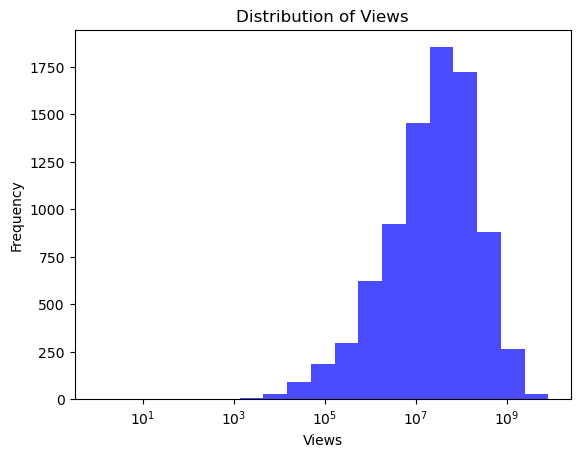

In [23]:
#distribution of views, logarithmic x scale

plt.hist(df["Views"], bins=np.logspace(np.log10(1), np.log10(df["Views"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.xscale('log')

views_min = df["Views"].min()
views_max = df["Views"].max()
views_median = df["Views"].median()
views_mean = df["Views"].mean()

print("Views min: ", views_min)
print("Views max: ", views_max)
print("Views median: ", views_median)
print("Views mean: ", views_mean)

Stream min:  6574.0
Stream max:  3386520288.0
Stream median:  59988168.0


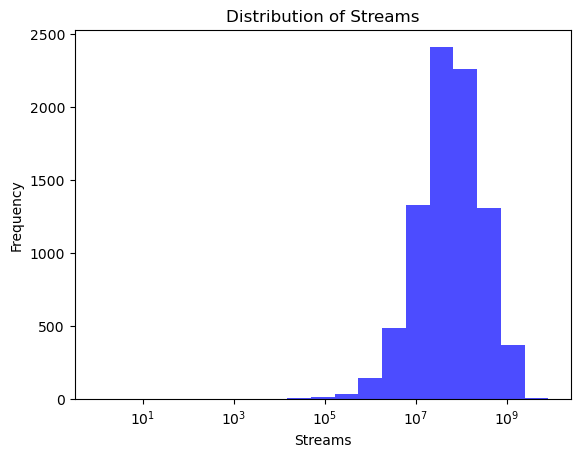

In [6]:
# distribution of streams, logarithmic x scale

plt.hist(df["Stream"], bins=np.logspace(np.log10(1), np.log10(df["Views"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.xscale('log')

stream_min = df["Stream"].min()
stream_max = df["Stream"].max()
stream_median = df["Stream"].median()

print("Stream min: ", stream_min)
print("Stream max: ", stream_max)
print("Stream median: ", stream_median)

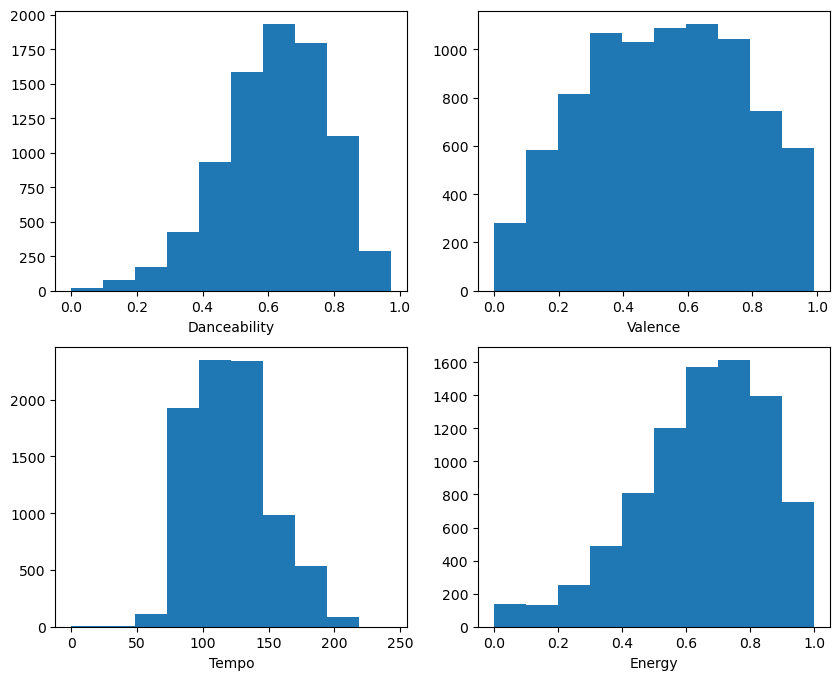

In [19]:
# histogram of four spotify API features 

# four subplots
fig, ((ax, bx), (cx, dx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ax.hist(df["Danceability"])
ax.set_xlabel('Danceability')

# second feature: 'Valence'
x_index = 0
bx.hist(df['Valence'])
bx.set_xlabel('Valence')

# third feature: 'Tempo'
x_index = 0
cx.hist(df['Tempo'])
cx.set_xlabel('Tempo')

# fourth feature: 'Energy'
x_index = 0
dx.hist(df['Energy'])
dx.set_xlabel('Energy')

plt.show()

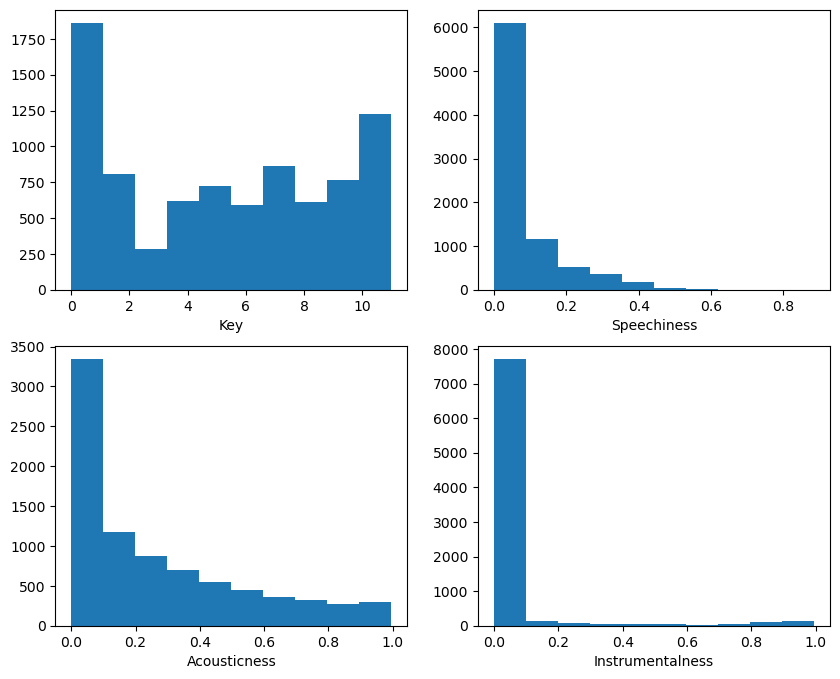

In [20]:
# histogram of four more spotify API features 

# four subplots
fig, ((ex, fx), (hx, gx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ex.hist(df["Key"])
ex.set_xlabel('Key')

# second feature: 'Valence'
x_index = 0
fx.hist(df['Speechiness'])
fx.set_xlabel('Speechiness')

# third feature: 'Tempo'
x_index = 0
hx.hist(df['Acousticness'])
hx.set_xlabel('Acousticness')

# fourth feature: 'Energy'
x_index = 0
gx.hist(df['Instrumentalness'])
gx.set_xlabel('Instrumentalness')

plt.show()

# Linear Regression Models to Predict Streams

In [7]:
# Testing simple linear regression with 'danceability' as a predictor for 'streams'

x1 = df["Danceability"]
y = df["Stream"]

x1 = x1.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

# Training model
model = LinearRegression()
model.fit(x1, y)
y_pred = model.predict(x1)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(MSE)
print(R2)

7.619707959123851e+16
0.0021880279790010837


In [21]:
# Multivariate regression with all Spotify API variables

x_all = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
x_all = x_all.to_numpy().reshape(-1,10)

model = LinearRegression()
model.fit(x_all, y)
y_pred = model.predict(x_all)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(MSE)
print(R2)

1.0519373876235758e+17
0.016560845630661958


In [10]:
x3 = df[['Energy', 'Valence', 'Tempo']]
x3 = x3.to_numpy().reshape(-1,3)

model = LinearRegression()
model.fit(x3, y)
y_pred = model.predict(x3)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(MSE)
print(R2)

7.617499196914757e+16
0.00247726864116371


# Linear Regression Models to Predict Views

In [11]:
x1 = df["Danceability"]
y = df["Views"]

x1 = x1.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

# Training model
model = LinearRegression()
model.fit(x1, y)
y_pred = model.predict(x1)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(MSE)
print(R2)

1.063282784227093e+17
0.0059542188741461555


In [12]:
# Multivariate regression with 6 Spotify API variables

x_all = df[['Danceability', 'Energy', 'Instrumentalness', 'Acousticness', 'Valence', 'Tempo']]
x_all = x_all.to_numpy().reshape(-1,6)

model = LinearRegression()
model.fit(x_all, y)
y_pred = model.predict(x_all)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print(MSE)
print(R2)

1.0577145597794635e+17
0.011159861345402033
